# Ensemble Learning and Random Forests

# Import and Visualize the MAKE_MOONS dataset

### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [24]:
###################################################################################################################
#                                   ''' Import the iris dataset '''                                    
###################################################################################################################
from sklearn.datasets import make_moons
from sklearn.model_selection import StratifiedShuffleSplit

X, y = make_moons(n_samples=1000, noise=0.2)

df = pd.DataFrame(X, columns=['X1', 'X2'])
df['Y'] = pd.Series(y)

X_train, y_train, X_test, y_test = [
    df.loc[0:800,['X1', 'X2']], 
    df.loc[0:800,['Y']],
    df.loc[801:1000,['X1', 'X2']], 
    df.loc[801:1000,['Y']]]


In [30]:
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(df, df["X1"]):
#     strat_train_set = df.loc[train_index]
#     strat_test_set = df.loc[test_index]
#     # drop the 'income_category' field
# #     for set_ in (strat_train_set, strat_test_set):
# #         set_.drop("X1", axis=1, inplace=True)
        
# df = strat_train_set.copy()


### Visualize

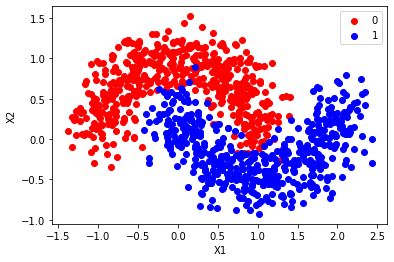

In [31]:
plt.scatter(df[df['Y']==0]['X1'], df[df['Y']==0]['X2'], label='0', color='red')
plt.scatter(df[df['Y']==1]['X1'], df[df['Y']==1]['X2'], label='1', color='blue')

# Prettify the graph
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')

# # scale
# plt.xticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])    # changing x1 scale by own
# plt.yticks([-1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])    # changing x2 scale by own

# display
plt.show()

# Train and Visualize and Predict with the Voting Classifiers

### train

In [36]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)


from sklearn.metrics import accuracy_score
for clf in [log_clf, rnd_clf, svm_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred), sep=': ')

/home/ange/WORKSPACE/AI/0-Hands-on-Machine-Learning-with-Scikit-Learn-Keras-TensorFlow/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ange/WORKSPACE/AI/0-Hands-on-Machine-Learning-with-Scikit-Learn-Keras-TensorFlow/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ange/WORKSPACE/AI/0-Hands-on-Machine-Learning-with-Scikit-Learn-Keras-TensorFlow/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '

LogisticRegression: 0.8793969849246231
RandomForestClassifier: 0.9698492462311558
SVC: 0.9748743718592965


/home/ange/WORKSPACE/AI/0-Hands-on-Machine-Learning-with-Scikit-Learn-Keras-TensorFlow/my_env/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


VotingClassifier: 0.9748743718592965


### visualize

#### visualize 1

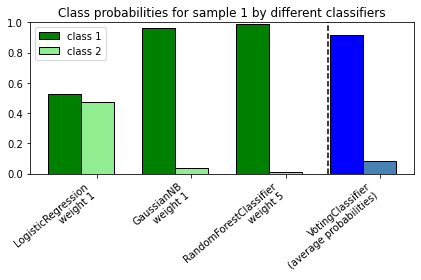

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(max_iter=1000, random_state=123)
clf2 = RandomForestClassifier(n_estimators=100, random_state=123)
clf3 = GaussianNB()
X = np.array([[-1.0, -1.0], [-1.2, -1.4], [-3.4, -2.2], [1.1, 1.2]])
y = np.array([1, 1, 2, 2])

eclf = VotingClassifier(
    estimators=[("lr", clf1), ("rf", clf2), ("gnb", clf3)],
    voting="soft",
    weights=[1, 1, 5],
)

# predict class probabilities for all classifiers
probas = [c.fit(X, y).predict_proba(X) for c in (clf1, clf2, clf3, eclf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(
    ind + width,
    np.hstack(([class2_1[:-1], [0]])),
    width,
    color="lightgreen",
    edgecolor="k",
)

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width, color="blue", edgecolor="k")
p4 = ax.bar(
    ind + width, [0, 0, 0, class2_1[-1]], width, color="steelblue", edgecolor="k"
)

# plot annotations
plt.axvline(2.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    [
        "LogisticRegression\nweight 1",
        "GaussianNB\nweight 1",
        "RandomForestClassifier\nweight 5",
        "VotingClassifier\n(average probabilities)",
    ],
    rotation=40,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities for sample 1 by different classifiers")
plt.legend([p1[0], p2[0]], ["class 1", "class 2"], loc="upper left")
plt.tight_layout()
plt.show()

#### visualize 2

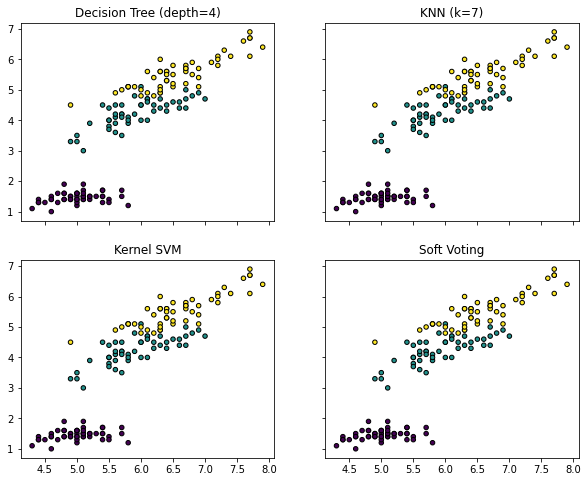

In [10]:
from itertools import product

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# from sklearn.inspection import DecisionBoundaryDisplay

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
#     DecisionBoundaryDisplay.from_estimator(
#         clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
#     )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()